### Loading files

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
xy = np.loadtxt('csvs/test_score.csv', delimiter = ',', dtype = np.float32)

x_data = xy[:, :-1]
y_data = xy[:, [-1]]

In [14]:
print(x_data.shape, y_data.shape)

(6, 3) (6, 1)


In [23]:
X = tf.placeholder(tf.float32, shape = [None, 3])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([3,1]), name = 'W')
b = tf.Variable(tf.random_normal([1]), name = 'b')

hyp = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.square(hyp - Y))
opt = tf.train.GradientDescentOptimizer(learning_rate = 1e-5)
train = opt.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_list = []
for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hyp, train], feed_dict = {X: x_data, Y: y_data})
    cost_list.append(cost_val)
    if step%10 == 0:
        print(step, 'cost', cost_val, '\nprediction\n', hy_val)
        

0 cost 28664.213 
prediction
 [[ -8.976175 ]
 [ -5.840822 ]
 [ -8.120558 ]
 [-10.243822 ]
 [ -2.222826 ]
 [ -3.5258694]]
10 cost 4.077039 
prediction
 [[148.86237]
 [183.91165]
 [178.8233 ]
 [193.34145]
 [142.51443]
 [103.17159]]
20 cost 2.7473772 
prediction
 [[149.93861]
 [185.19319]
 [180.0923 ]
 [194.7222 ]
 [143.48985]
 [103.88733]]
30 cost 2.7322934 
prediction
 [[149.95317 ]
 [185.1983  ]
 [180.10385 ]
 [194.73354 ]
 [143.4917  ]
 [103.885315]]
40 cost 2.7173824 
prediction
 [[149.96053]
 [185.19481]
 [180.10684]
 [194.73557]
 [143.48698]
 [103.87846]]
50 cost 2.7025597 
prediction
 [[149.96779 ]
 [185.19125 ]
 [180.10979 ]
 [194.73756 ]
 [143.48222 ]
 [103.871605]]
60 cost 2.6878388 
prediction
 [[149.97504]
 [185.18771]
 [180.11272]
 [194.73952]
 [143.47746]
 [103.86477]]
70 cost 2.6732247 
prediction
 [[149.98225]
 [185.18417]
 [180.11565]
 [194.74149]
 [143.47273]
 [103.85796]]
80 cost 2.6587126 
prediction
 [[149.98944 ]
 [185.18065 ]
 [180.11853 ]
 [194.74341 ]
 [143.46802

1390 cost 1.392677 
prediction
 [[150.75227]
 [184.80731]
 [180.42657]
 [194.95015]
 [142.96777]
 [103.13105]]
1400 cost 1.3866347 
prediction
 [[150.75691]
 [184.80507]
 [180.42845]
 [194.95143]
 [142.96475]
 [103.12667]]
1410 cost 1.3806415 
prediction
 [[150.76155 ]
 [184.80283 ]
 [180.43034 ]
 [194.95268 ]
 [142.96173 ]
 [103.122314]]
1420 cost 1.3746781 
prediction
 [[150.76616]
 [184.80055]
 [180.4322 ]
 [194.95392]
 [142.95871]
 [103.11795]]
1430 cost 1.3687687 
prediction
 [[150.77074 ]
 [184.7983  ]
 [180.43404 ]
 [194.95515 ]
 [142.95569 ]
 [103.113625]]
1440 cost 1.3628751 
prediction
 [[150.77533]
 [184.79605]
 [180.4359 ]
 [194.9564 ]
 [142.9527 ]
 [103.10929]]
1450 cost 1.3570342 
prediction
 [[150.77989 ]
 [184.79384 ]
 [180.43773 ]
 [194.95764 ]
 [142.94969 ]
 [103.104996]]
1460 cost 1.3512287 
prediction
 [[150.78442 ]
 [184.7916  ]
 [180.43958 ]
 [194.95886 ]
 [142.9467  ]
 [103.100685]]
1470 cost 1.3454695 
prediction
 [[150.78894 ]
 [184.78937 ]
 [180.44139 ]
 [194.

In [22]:
print('your score will be ',sess.run(hyp, feed_dict = {X: [[100,70,101]]}))

your score will be  [[194.09616]]


* feed dict에 시험점수 값을 넣으면 예상 final 값을 리턴

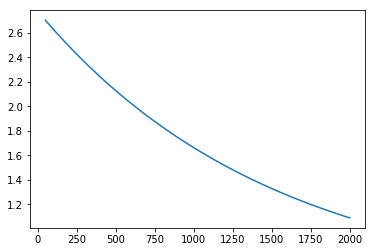

In [30]:
plt.plot(range(50,2001), cost_list[50:])
plt.show()